In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
car_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",names = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price'])

In [4]:
car_df = car_df.drop('make', axis=1)  # dropping make here but in real project, may separate data based on make. 
#The different makes in same data set may not be a good idea

# dropping following columns due to low variance filter. i.e an attribute which is mostly one type of data is not a good dimension
car_df = car_df.drop('fuel_type', axis=1)
car_df = car_df.drop('engine_location', axis=1)
car_df = car_df.drop('num_of_doors', axis=1) 
car_df = car_df.drop('body_style' , axis=1)
car_df = car_df.drop('drive_wheels', axis=1)
car_df = car_df.drop('engine_type', axis=1) # need more info on this column
car_df = car_df.drop('fuel_system', axis=1)
car_df = car_df.drop('aspiration', axis=1)
car_df = car_df.drop('normalized_losses', axis=1)

In [5]:
car_df['cylinder'] = car_df['num_of_cylinders'].replace({'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five':5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10, 'eleven': 11, 'twelve': 12})

In [6]:
car_df = car_df.replace('?', np.nan)  #replace ? with NA which is equivalent of NULL
#car_df[car_df.isnull().any(axis=1)]  # display records with 'NA' 

# Change the attribute types from object to float type (generic numeric types) 
car_df['bore'] = car_df['bore'].astype('float64')
car_df['stroke']= car_df['stroke'].astype('float64')
car_df['horsepower']= car_df['horsepower'].astype('float64')
car_df['peak_rpm']= car_df['peak_rpm'].astype('float64')
car_df['price'] = car_df['price'].astype('float64')
#car_df['cylinder']= car_df['cylinder'].astype('int64')  # not required 
#car_df['normalized_losses']= car_df['normalized_losses'].astype('float64')

# fill up NaN in numeric columns with median values of those columns respectively
car_df['price'] = car_df['price'].fillna(car_df['price'].median())
car_df['bore']= car_df['bore'].fillna(car_df['bore'].median())
car_df['horsepower'] = car_df['horsepower'].fillna(car_df['horsepower'].median())
car_df['peak_rpm'] = car_df['peak_rpm'].fillna(car_df['peak_rpm'].median())
car_df['stroke'] = car_df['stroke'].fillna(car_df['stroke'].median())
car_df['cylinder'] = car_df['cylinder'].fillna(car_df['cylinder'].median())

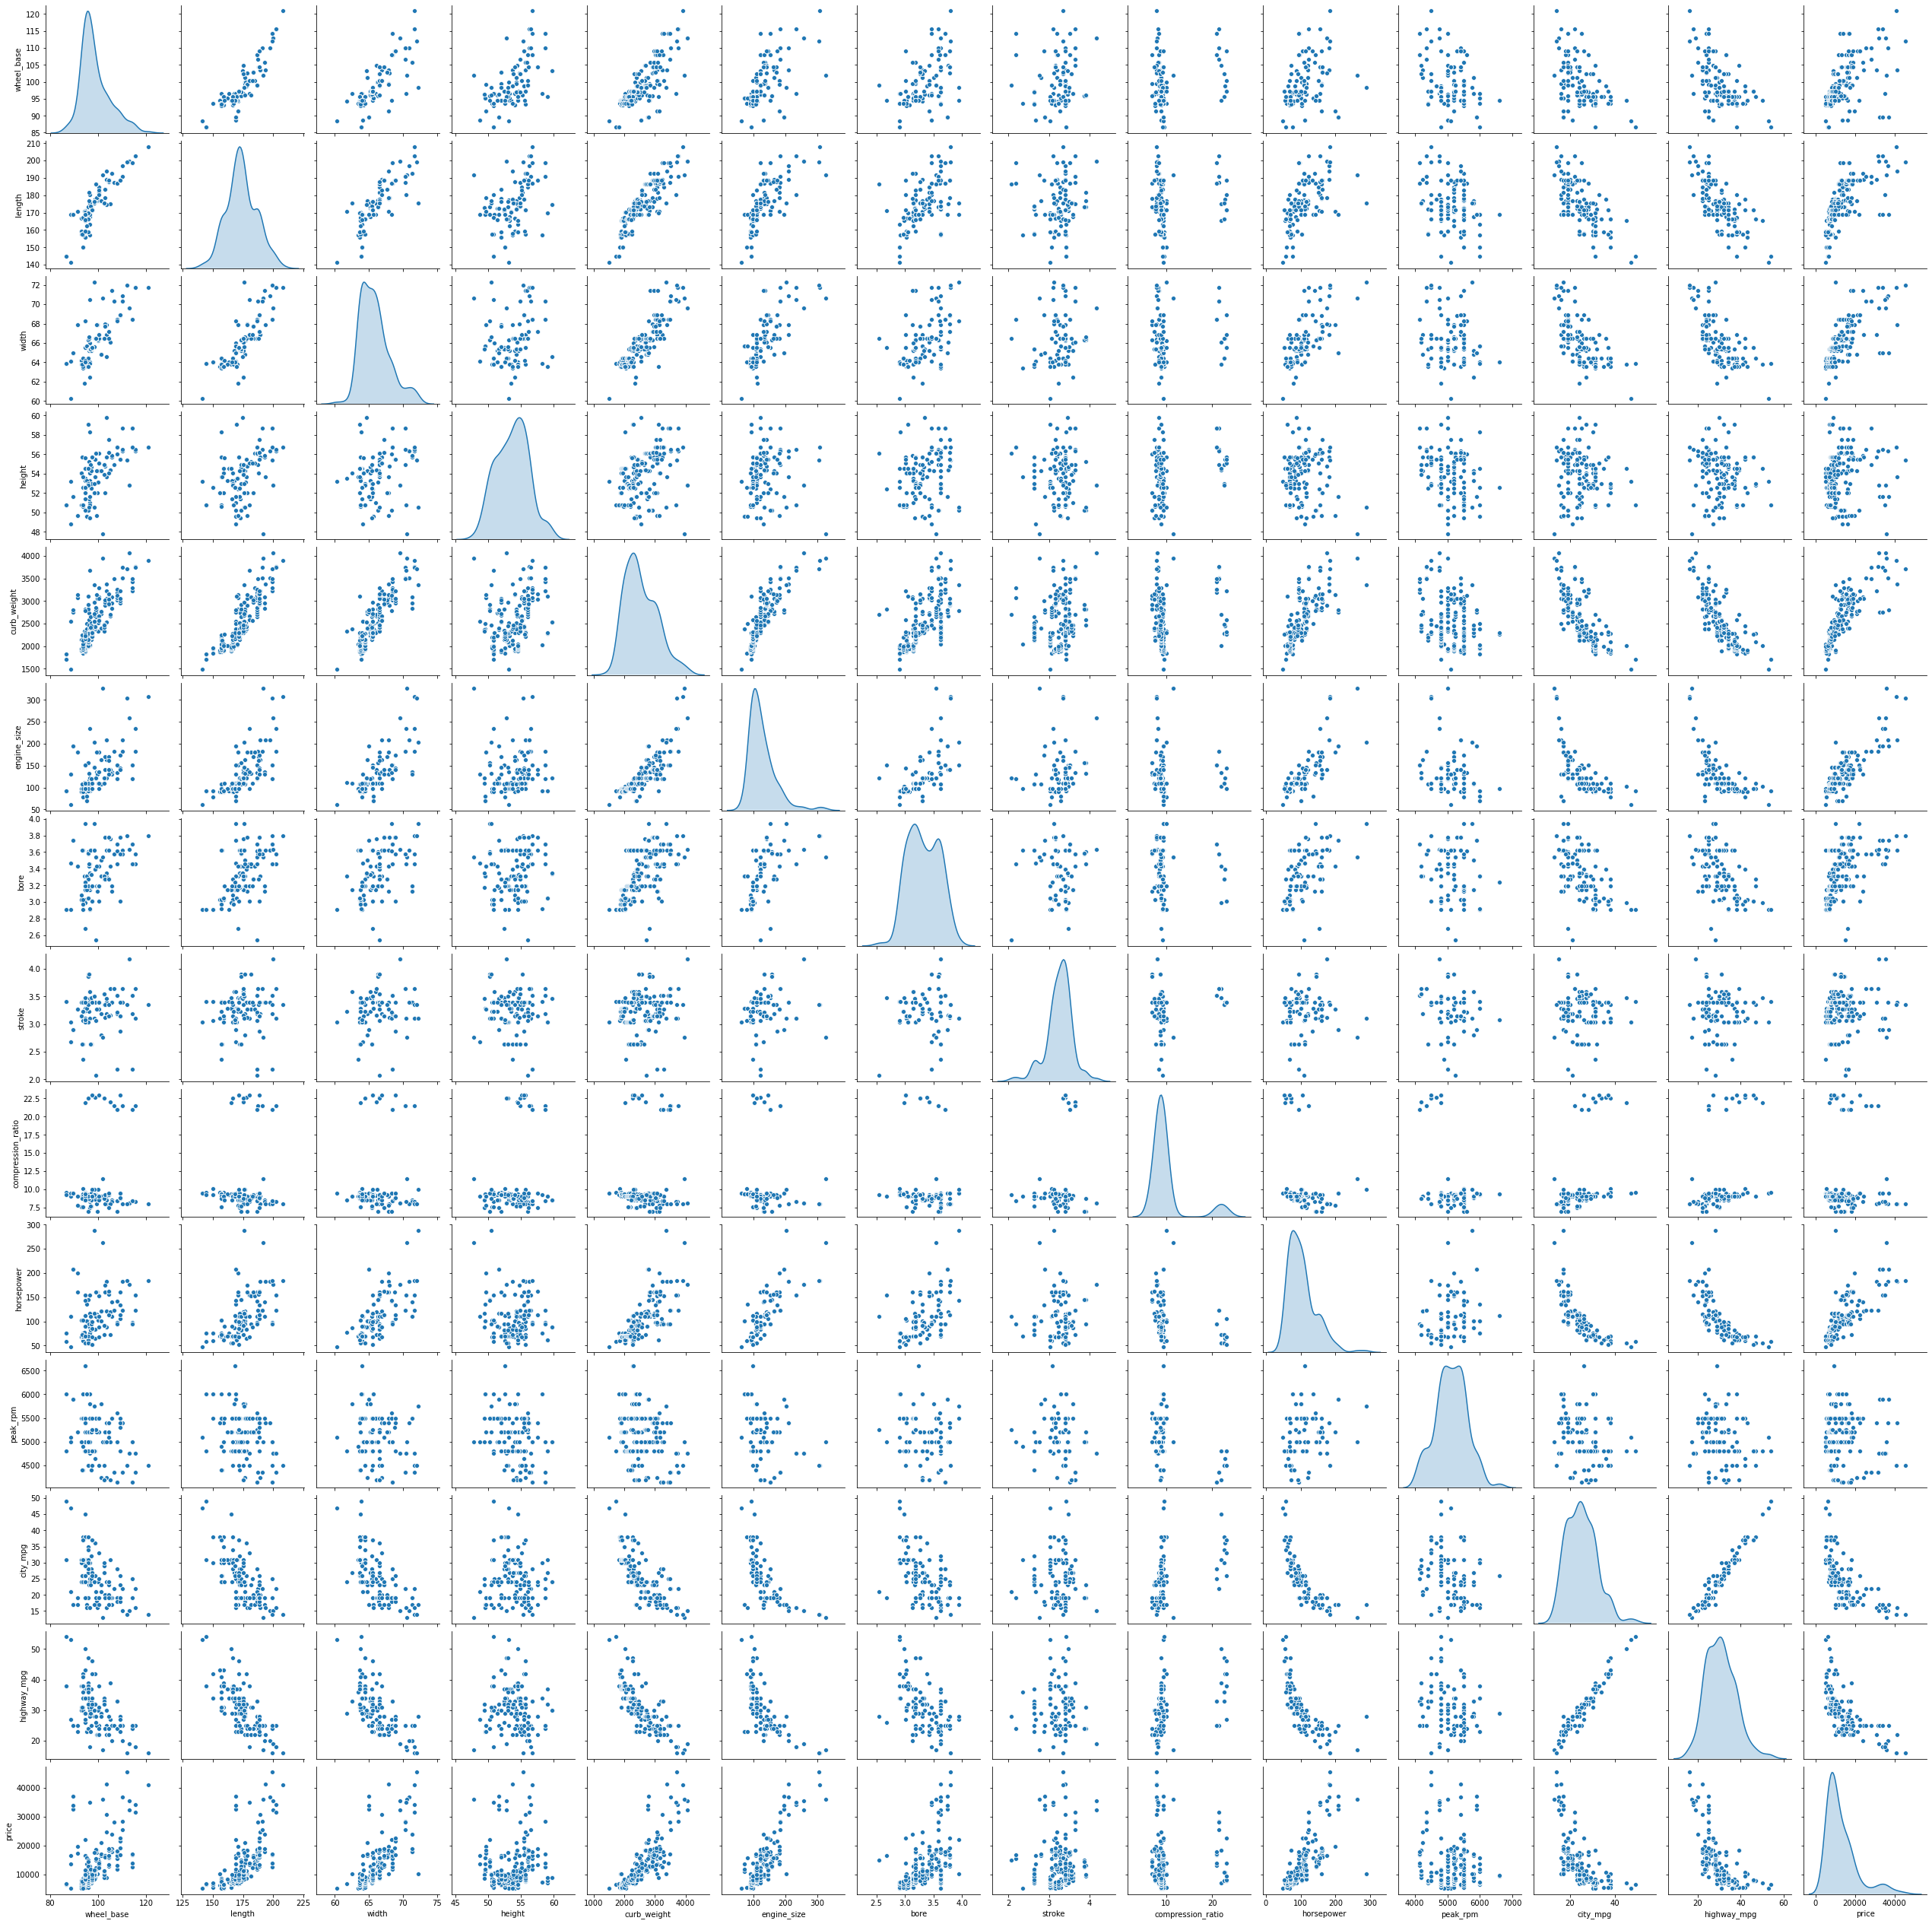

In [6]:
import seaborn as sns
car_df_attr = car_df.iloc[:,1:16]

sns.pairplot(car_df_attr , diag_kind = 'kde')

In [7]:
X = car_df.drop('price', axis=1)
X = X.drop('num_of_cylinders', axis=1)# Removing this column as we have created another column "cylinder" out of this

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = car_df[['price']]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [46]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [49]:
import joblib 
joblib.dump(model,'model.pkl')

TypeError: can't pickle _thread.RLock objects

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [11]:
X_train.dtype

dtype('float64')

Neural Network model creation

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import keras

Using TensorFlow backend.


In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(15, activation="relu", input_shape=X_train.shape[1:]),
tf.keras.layers.Dense(5000, activation="relu"),
tf.keras.layers.Dense(4500, activation="relu"),
tf.keras.layers.Dense(4000, activation="relu"),
tf.keras.layers.Dense(3500, activation="relu"),
tf.keras.layers.Dense(3000, activation="relu"),
   tf. keras.layers.Dense(2500, activation="relu"),
    tf.keras.layers.Dense(2000, activation="relu"),
    tf.keras.layers.Dense(1500, activation="relu"),
    tf.keras.layers.Dense(1000, activation="relu"),
     tf.keras.layers.Dense(500, activation="relu"),
     tf.keras.layers.Dense(250, activation="relu"), 
   tf.keras.layers.Dense(125, activation="relu"), 
    tf.keras.layers.Dense(75, activation="relu"), 
    tf.keras.layers.Dense(20, activation="relu"),
        
tf.keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
model.fit(X_train, y_train, epochs=30)
# print(model.summary())


Train on 153 samples
Epoch 1/30
153/153 [==============================] - 5s 35ms/sample - loss: 1.0027
Epoch 2/30
153/153 [==============================] - 2s 16ms/sample - loss: 0.9995
Epoch 3/30
153/153 [==============================] - 2s 16ms/sample - loss: 0.9974
Epoch 4/30
153/153 [==============================] - 3s 16ms/sample - loss: 0.9931
Epoch 5/30
153/153 [==============================] - 3s 17ms/sample - loss: 0.9902
Epoch 6/30
153/153 [==============================] - 3s 19ms/sample - loss: 0.9828
Epoch 7/30
153/153 [==============================] - 3s 20ms/sample - loss: 0.9778
Epoch 8/30
153/153 [==============================] - 3s 22ms/sample - loss: 0.9749
Epoch 9/30
153/153 [==============================] - 4s 25ms/sample - loss: 0.9724
Epoch 10/30
153/153 [==============================] - 4s 27ms/sample - loss: 0.9569
Epoch 11/30
153/153 [==============================] - 4s 27ms/sample - loss: 0.9457
Epoch 12/30
153/153 [==============================] 

In [36]:
score = model.evaluate(X_test,y_test,verbose=1)
print(score)

52/52 [==============================] - 0s 3ms/sample - loss: 0.6192
0.6191949844360352


In [37]:
X_new = X_test[:3] # pretend these are new instances
# X_new.shape
y_pred = model.predict(X_new)
print(y_pred)

[[-0.48380107]
 [-0.46059906]
 [-0.45821202]]


In [41]:
import joblib 

In [43]:
joblib.dump(model,'model.pkl')

TypeError: can't pickle _thread.RLock objects